In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore') #import libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive') #mount drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
d=pd.read_csv('/content/hotel_bookings.csv')
d.head(10)#import hotel file

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
d.info() #info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
d.duplicated().sum() #check duplicates

31994

In [6]:
d.drop_duplicates(inplace=True) #drop duplicates

In [7]:
d.isnull().sum() #check null values

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [8]:
d.drop('company',axis=1,inplace=True) #drop column company

In [9]:
d.country.replace("",np.nan,inplace=True) #replace nan with null values

In [10]:
d.agent.replace("",np.nan,inplace=True) #replace null values

In [11]:
d.drop('agent',axis=1,inplace=True) #drop agent column it has more missing values

In [12]:
d #table

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


<Axes: xlabel='reservation_status', ylabel='count'>

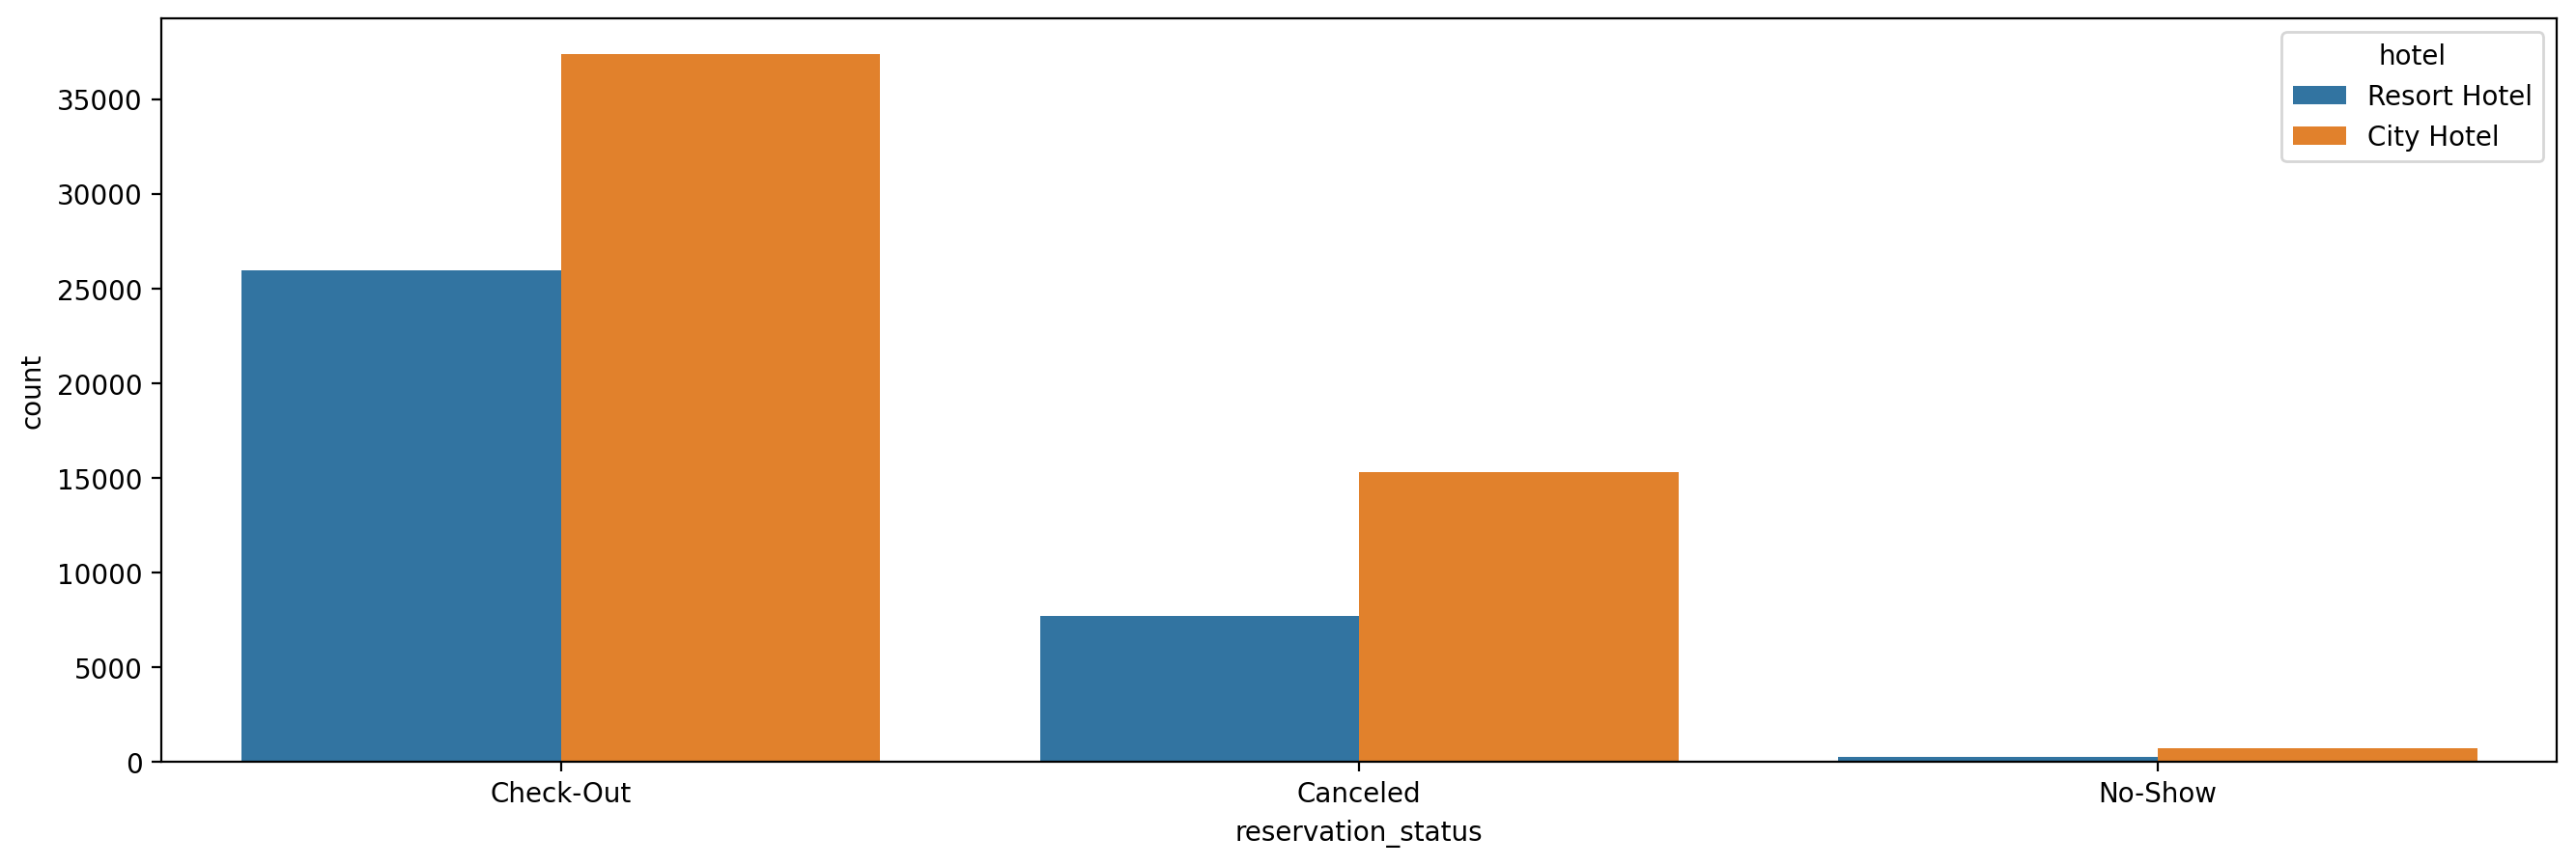

In [13]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='reservation_status',hue='hotel',data =d) #city hotel has higher checkouts than resort

<Axes: xlabel='total_of_special_requests', ylabel='count'>

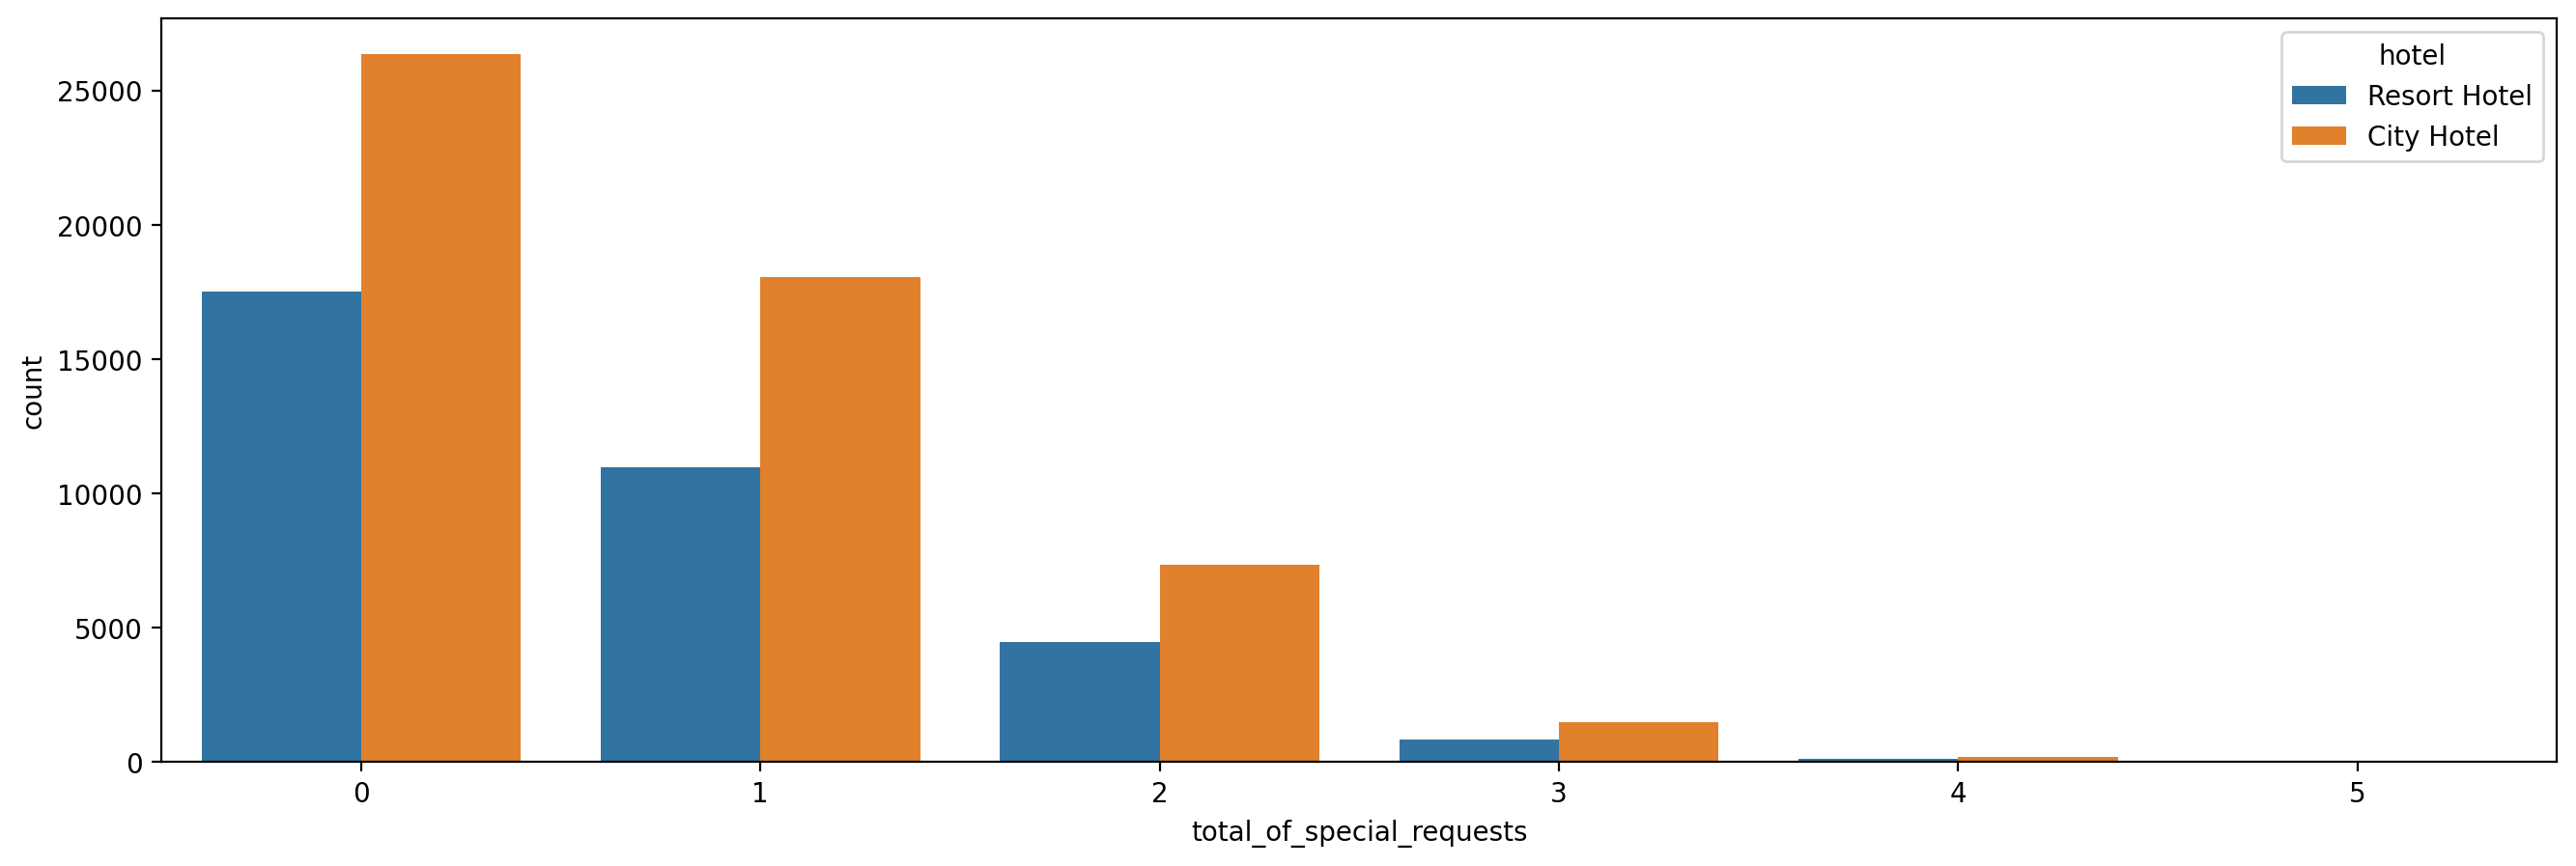

In [14]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='total_of_special_requests',hue='hotel',data =d) #special requests for city hotel is high

<Axes: xlabel='customer_type', ylabel='count'>

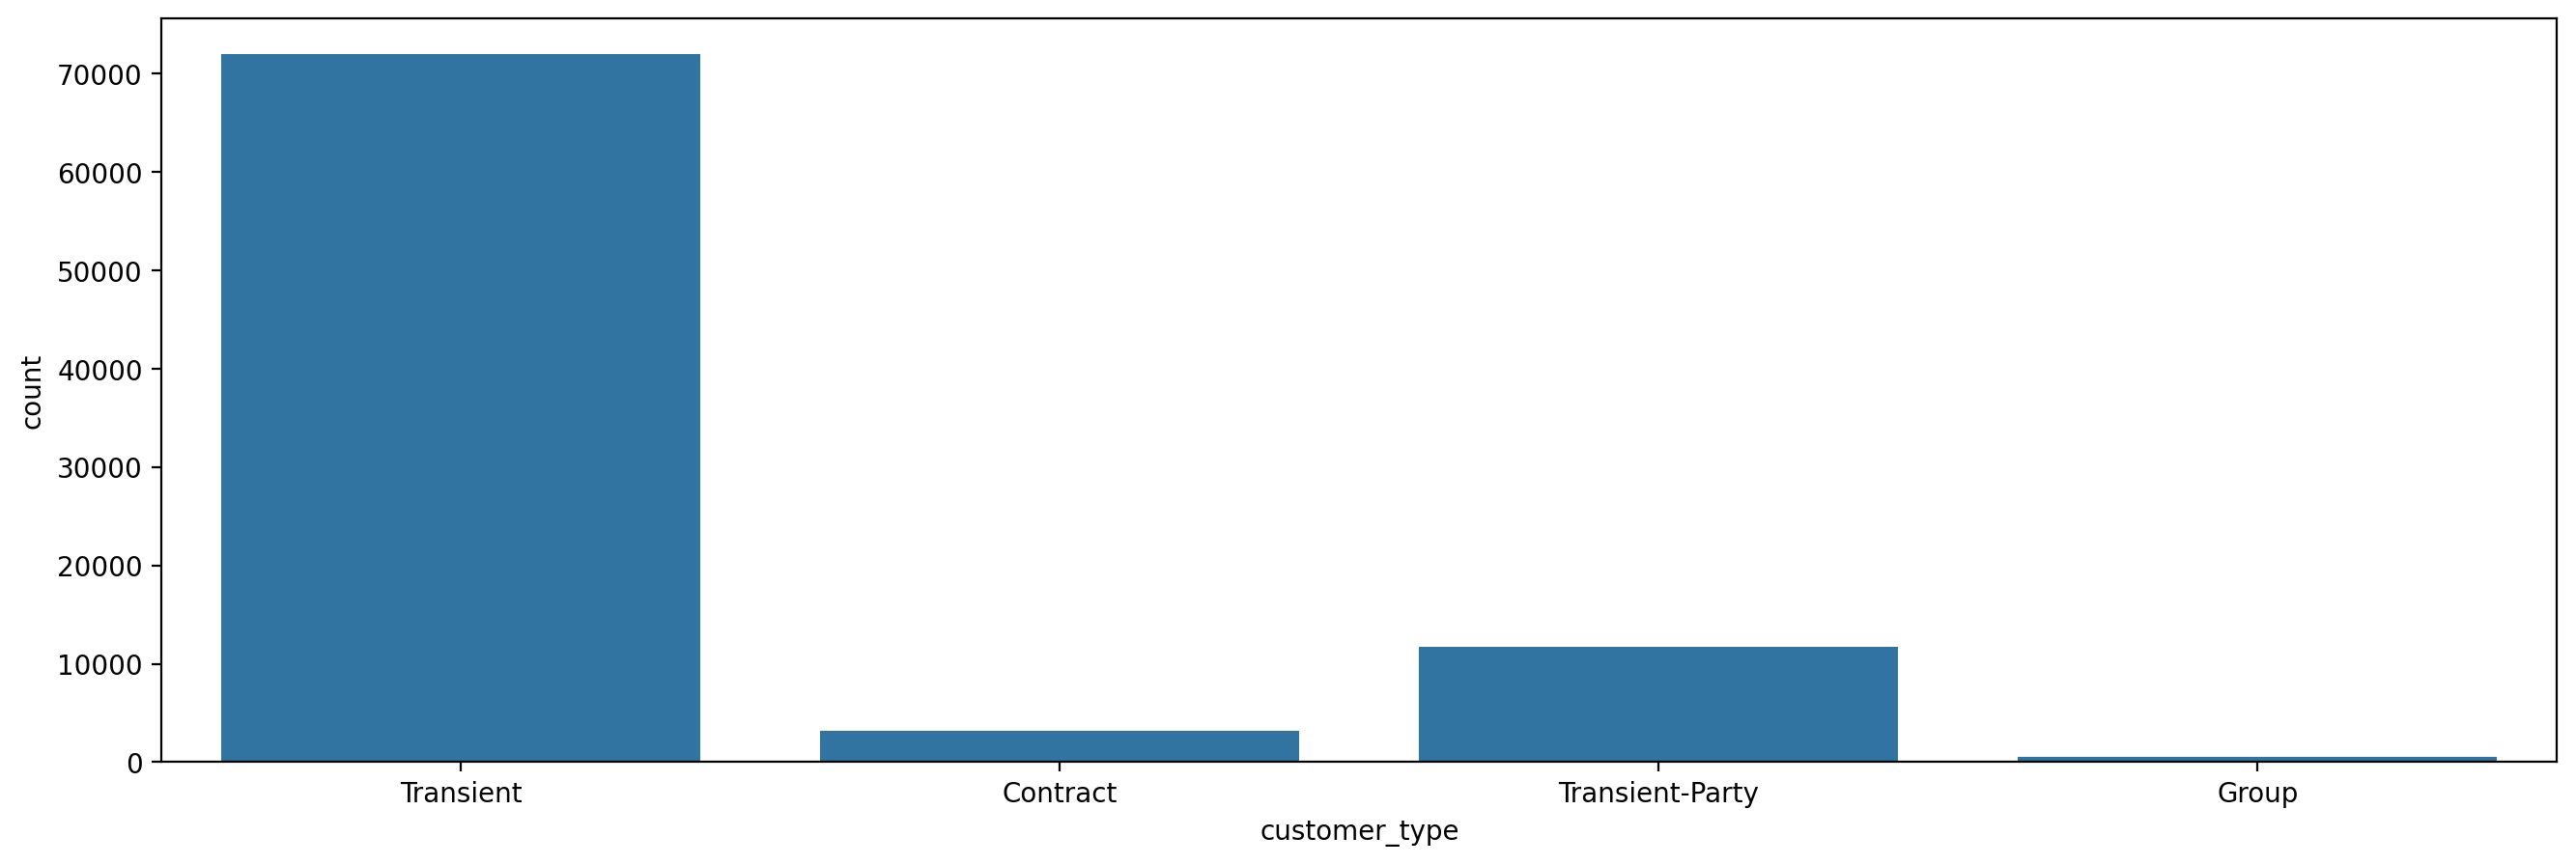

In [15]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='customer_type',data =d) #transient customer type count is more

<Axes: xlabel='is_repeated_guest', ylabel='count'>

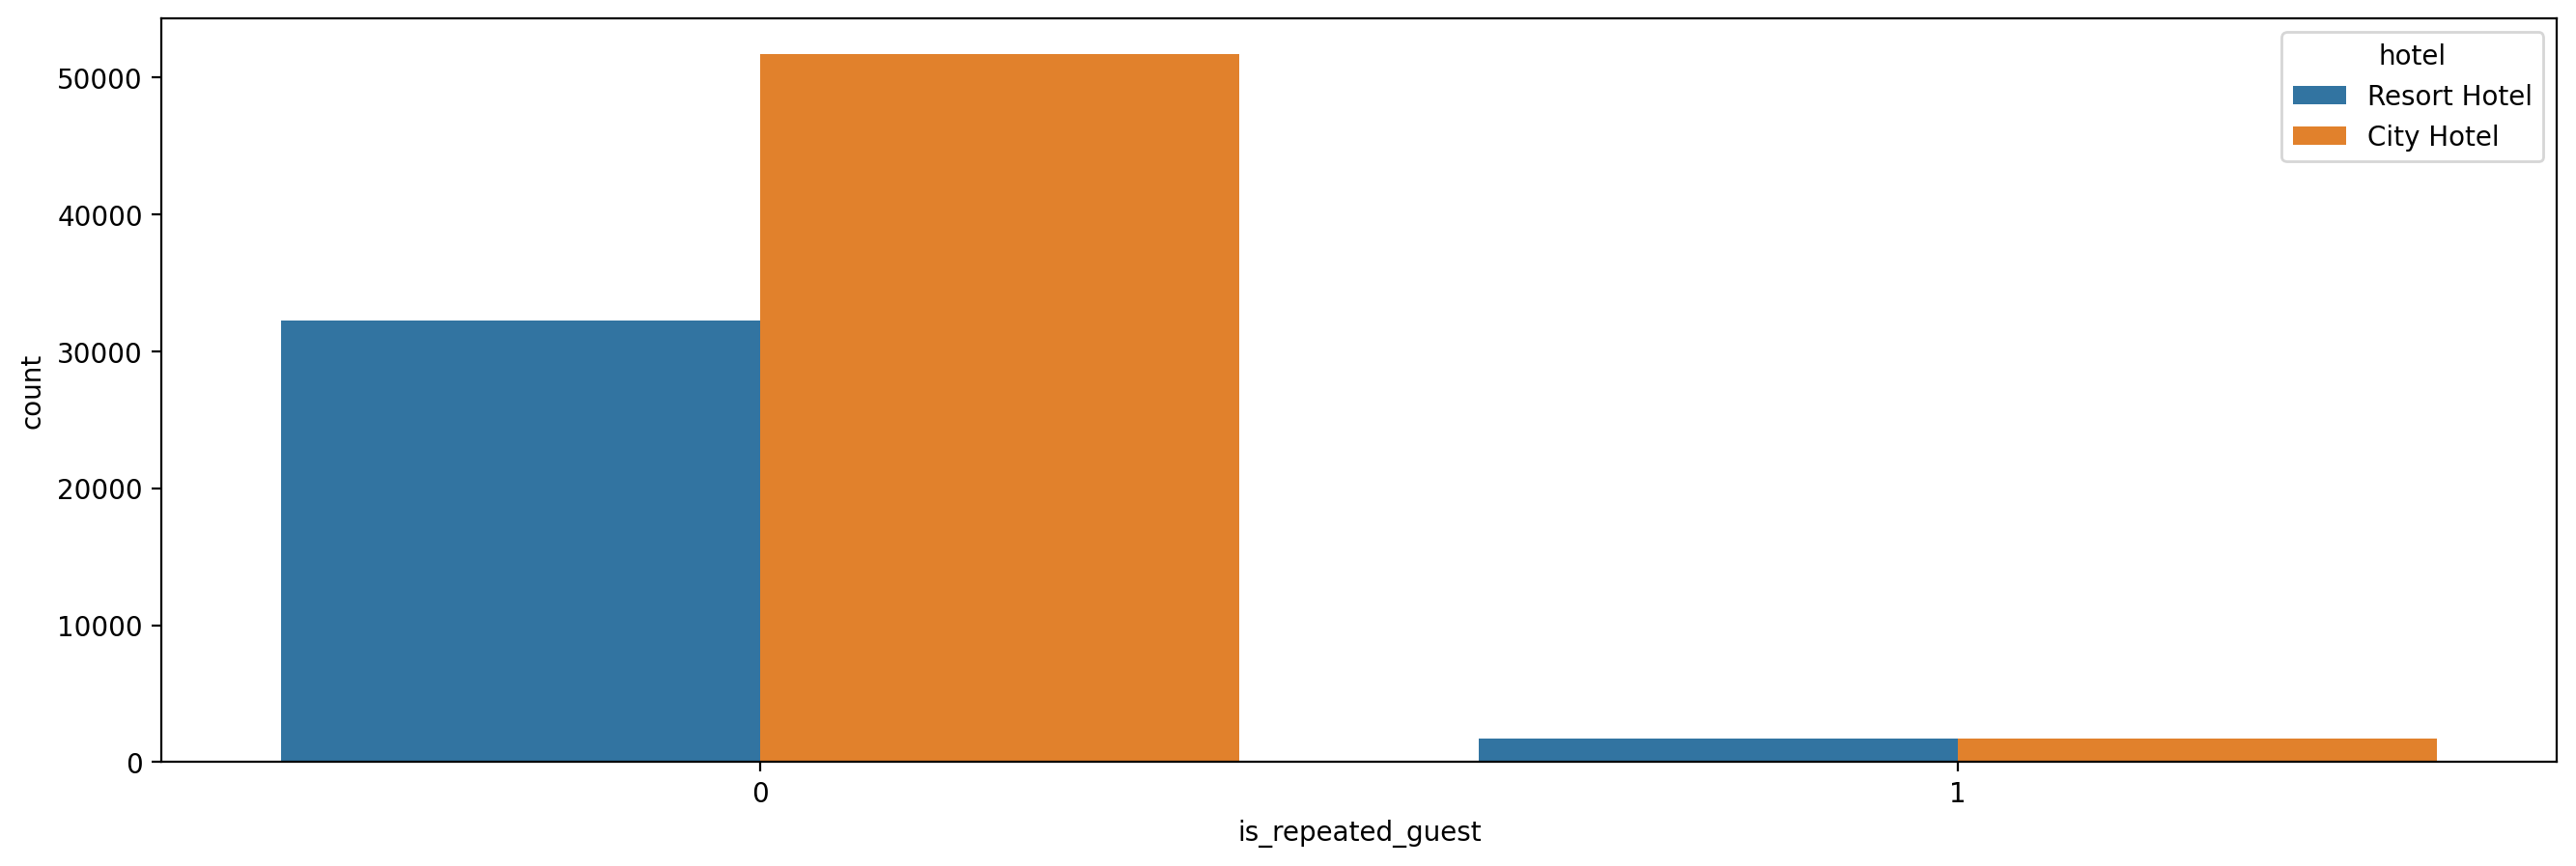

In [16]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='is_repeated_guest',hue='hotel',data =d) #repeated guest arrives more in city hotels

<Axes: xlabel='is_canceled', ylabel='count'>

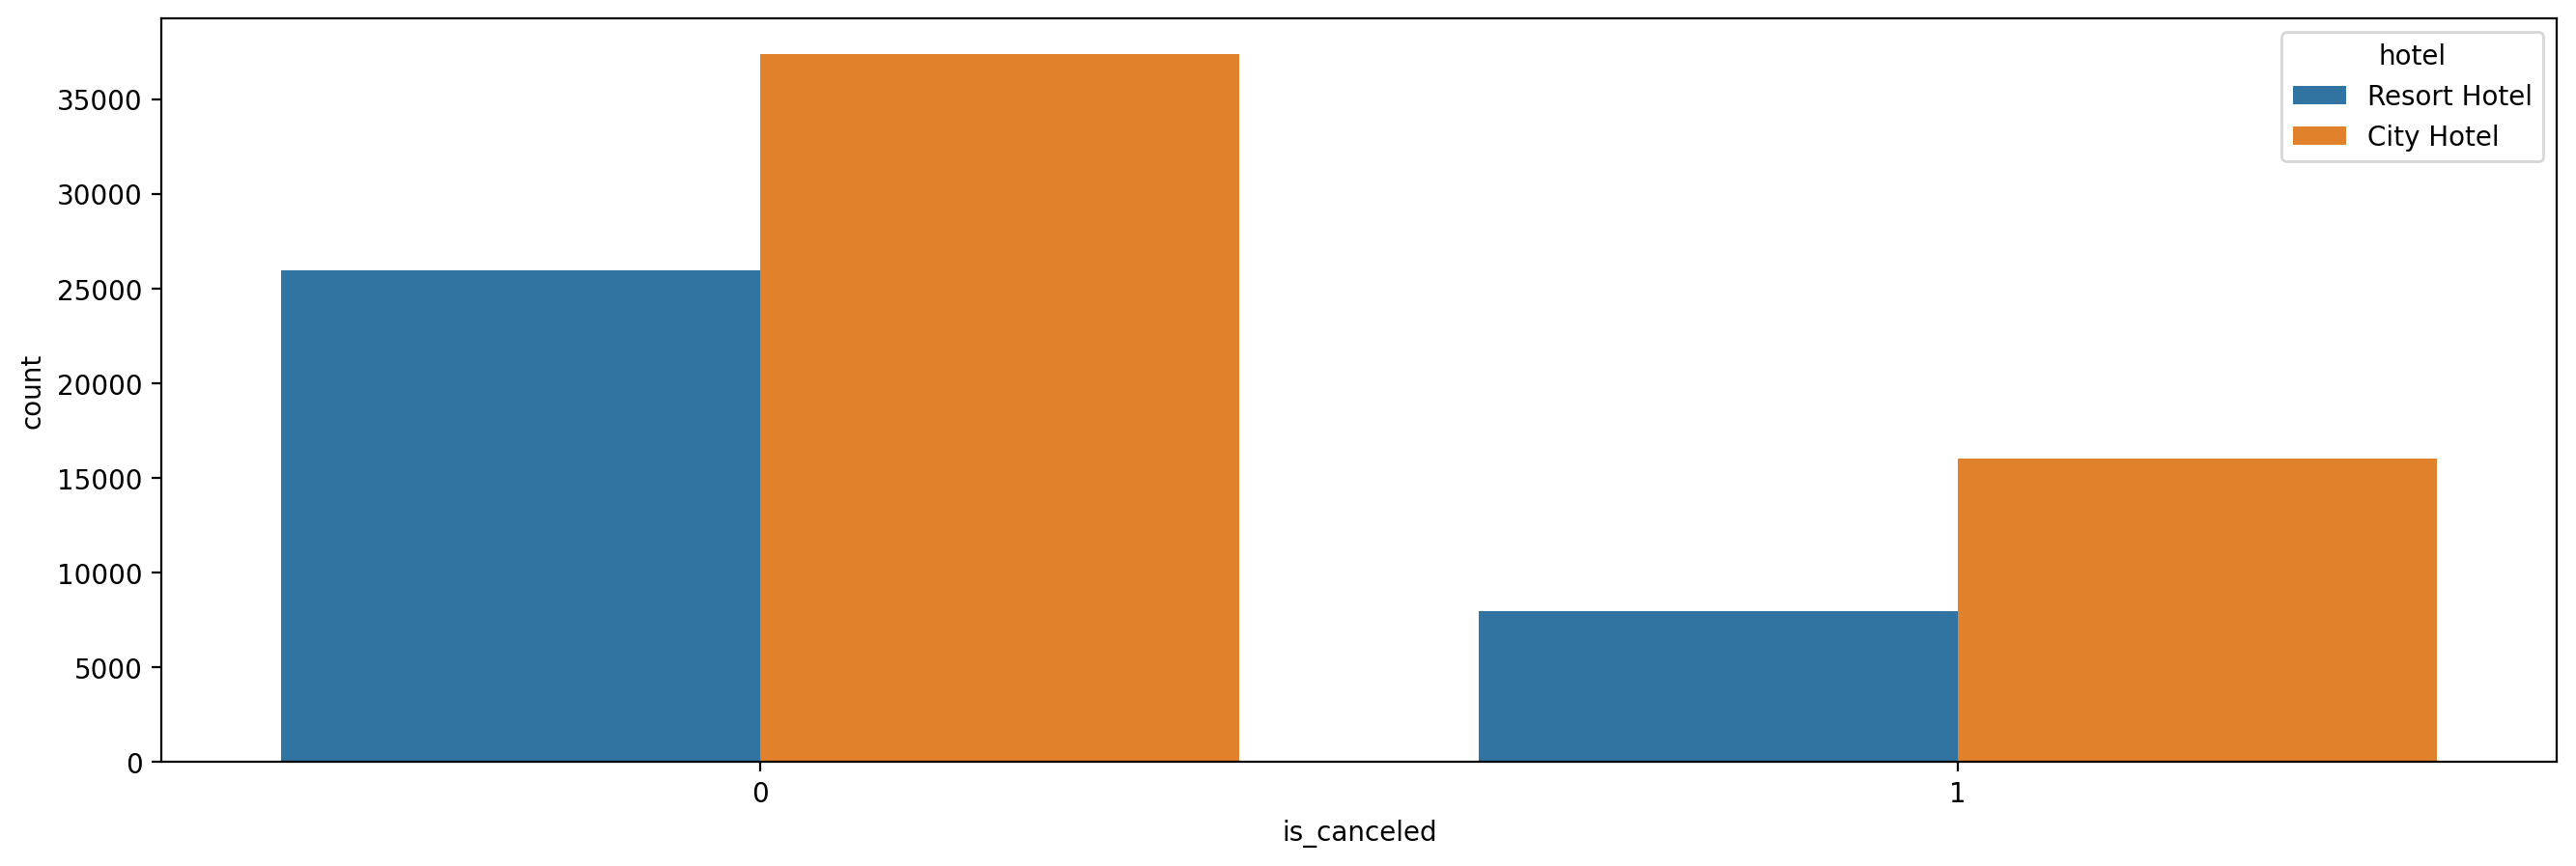

In [17]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='is_canceled',hue='hotel',data =d) #cancellation done high in city hotels

<Axes: xlabel='meal', ylabel='count'>

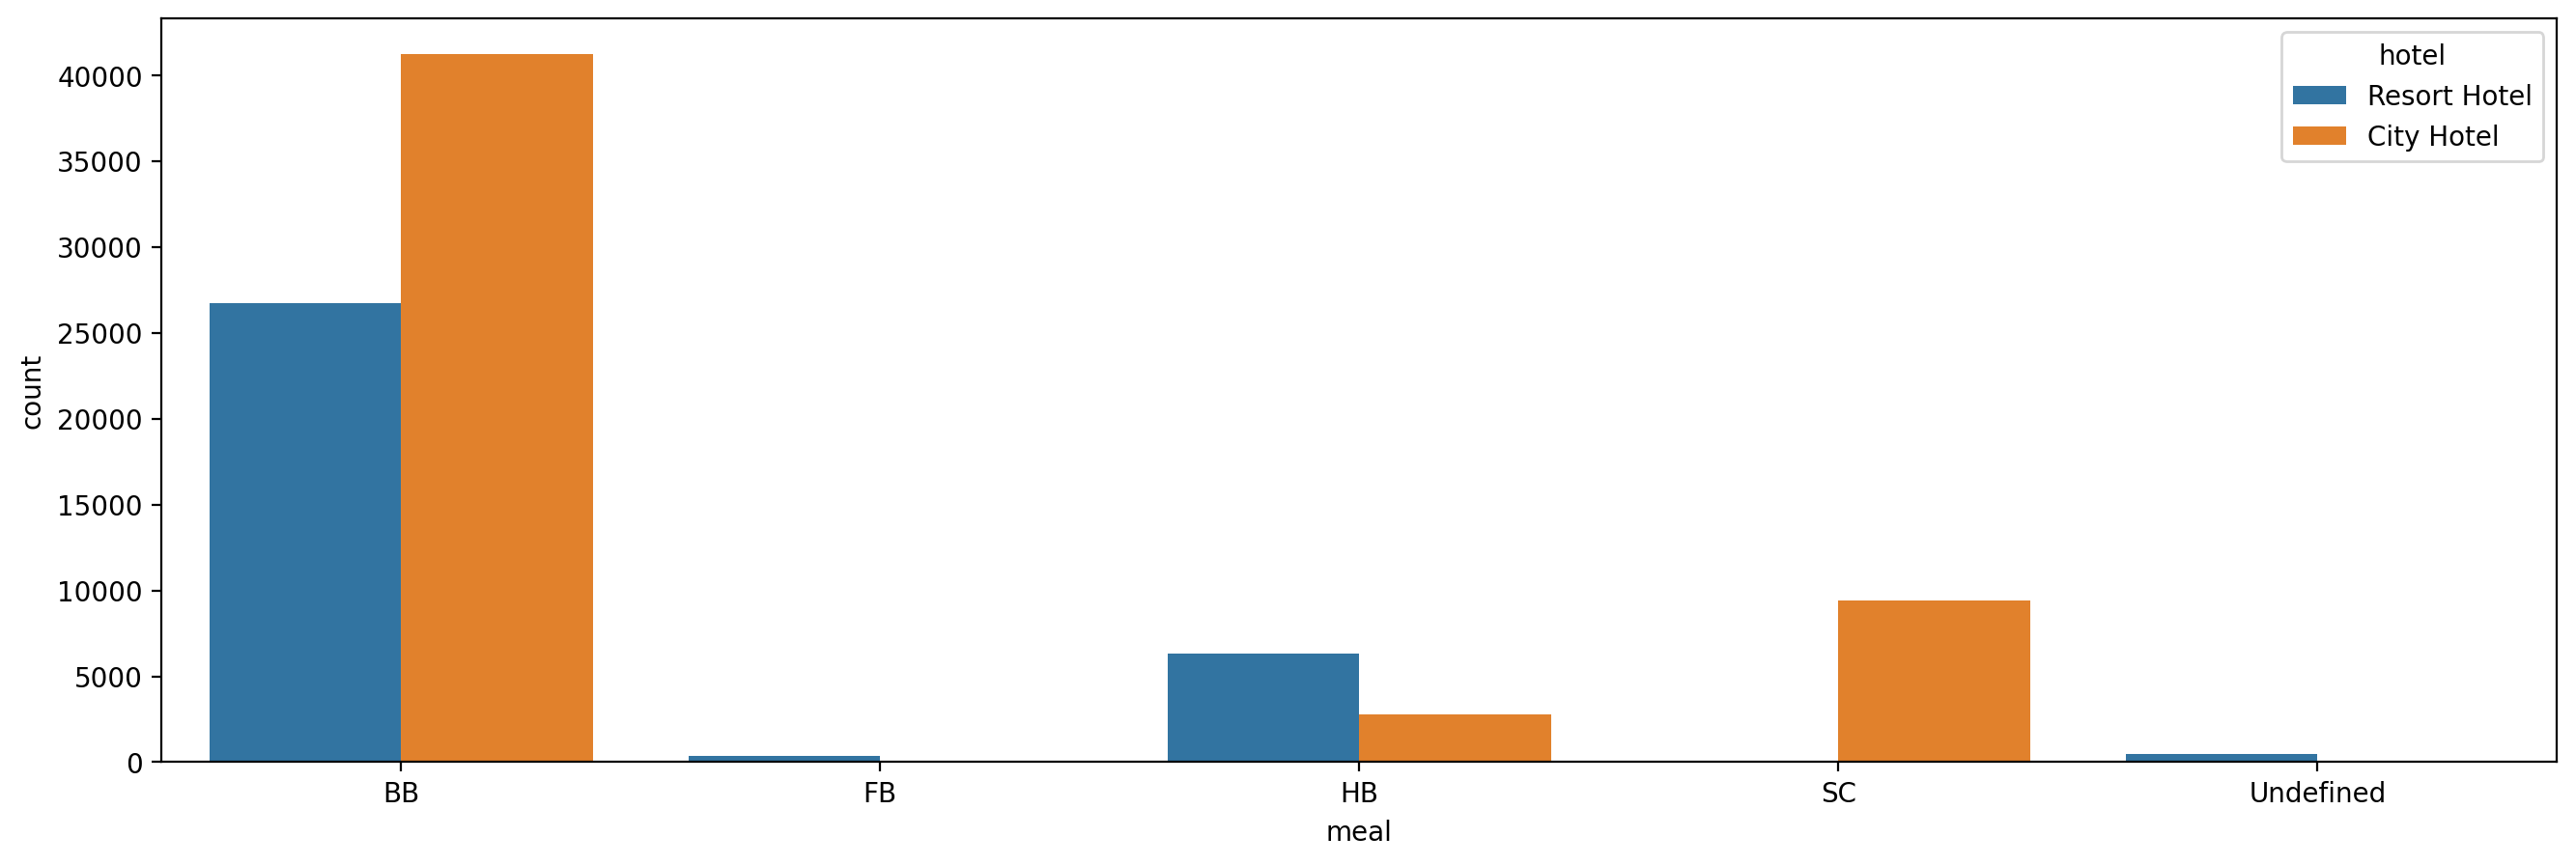

In [18]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='meal',hue='hotel',data =d) #BB meal is preferred more

In [19]:
obj = d.select_dtypes(include=['object']).columns
obj #seperate object columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [20]:
num = d.select_dtypes(include=['int','float']).columns
num #seperate numeric columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in d.columns:
    if d[col].dtype=='object':
        d[col] = label_encoder.fit_transform(d[col]) #encode object columns

In [22]:
from sklearn.preprocessing import MinMaxScaler #scaling numeric columns
scaler = MinMaxScaler()
for col in d.columns:
    if d[col].dtype in ['int','float']:
        d[col] = scaler.fit_transform(d[col].values.reshape(-1,1))

In [23]:
d.head() #table rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1.0,0.0,0.464043,0.0,0.454545,0.5,0.0,0.0,0.00,0.036364,...,0.181818,0.142857,0.0,0.0,0.666667,0.001180,0.0,0.0,0.5,0.130811
1,1.0,0.0,1.000000,0.0,0.454545,0.5,0.0,0.0,0.00,0.036364,...,0.181818,0.190476,0.0,0.0,0.666667,0.001180,0.0,0.0,0.5,0.130811
2,1.0,0.0,0.009498,0.0,0.454545,0.5,0.0,0.0,0.02,0.018182,...,0.181818,0.000000,0.0,0.0,0.666667,0.015053,0.0,0.0,0.5,0.131892
3,1.0,0.0,0.017639,0.0,0.454545,0.5,0.0,0.0,0.02,0.018182,...,0.000000,0.000000,0.0,0.0,0.666667,0.015053,0.0,0.0,0.5,0.131892
4,1.0,0.0,0.018996,0.0,0.454545,0.5,0.0,0.0,0.04,0.036364,...,0.000000,0.000000,0.0,0.0,0.666667,0.019307,0.0,0.2,0.5,0.132973


In [24]:
# filling null values with zero

d.fillna(0, inplace = True)

In [25]:
X = d.drop(['is_canceled'], axis=1)
Y = d['is_canceled'] #dependent and independent feature

In [26]:
from imblearn.under_sampling import NearMiss
nm_sampler=NearMiss()
x_sampled,y_sampled=nm_sampler.fit_resample(X,Y)

print('Data   : ',x_sampled.shape)
print('Labels : ',y_sampled.shape) #under_sample because our dependent features not balanced 

Data   :  (48050, 29)
Labels :  (48050,)


In [27]:
x_sampled.head() #sampled data

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0.0,0.157395,0.5,0.272727,0.173077,0.900000,0.105263,0.02,0.036364,0.0,...,0.0,0.047619,0.0,0.0,1.0,0.018937,0.0,0.0,0.5,0.395676
1,1.0,0.018996,0.5,0.181818,0.942308,0.133333,0.052632,0.04,0.036364,0.0,...,0.0,0.000000,0.0,0.0,1.0,0.016717,0.0,0.0,0.5,0.699459
2,1.0,0.054274,1.0,0.363636,0.038462,0.500000,0.052632,0.04,0.018182,0.0,...,0.0,0.000000,0.0,0.0,1.0,0.011353,0.0,0.0,0.5,0.744865
3,0.0,0.001357,0.0,1.000000,0.692308,0.166667,0.105263,0.00,0.018182,0.0,...,0.0,0.000000,0.0,0.0,1.0,0.015053,0.0,0.0,0.5,0.205405
4,1.0,0.089552,0.0,0.181818,0.923077,0.133333,0.052632,0.02,0.018182,0.0,...,0.0,0.000000,0.0,0.0,1.0,0.010798,0.0,0.0,0.5,0.302703


In [28]:
y_sampled.head() #dependent feature first few rows

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: is_canceled, dtype: float64

In [29]:
print('Independent Feature Set Shape : ', x_sampled.shape)
print('Dependent Feature Shape       : ', y_sampled.shape) #print the shape of x and y

Independent Feature Set Shape :  (48050, 29)
Dependent Feature Shape       :  (48050,)


In [30]:
from sklearn.model_selection import train_test_split #splt data
x_train, x_test, y_train, y_test = train_test_split(x_sampled,y_sampled, test_size=0.2, random_state=42)

In [31]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labesls Shape : ', y_test.shape) #data shape

Training Data Shape   :  (38440, 29)
Training Labels Shape :  (38440,)
Testing Data Shape    :  (9610, 29)
Testing Labesls Shape :  (9610,)


In [32]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(10, activation='relu',input_shape=x_train.shape[1:]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(200, kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(100, kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Dense(50, kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))



model.add(keras.layers.Dense(1, kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.summary() #model activation

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                300       
                                                                 
 batch_normalization (Batch  (None, 10)                40        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 200)               2200      
                                                                 
 batch_normalization_1 (Bat  (None, 200)               800       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 200)               0

In [33]:
# Compile the model
model.compile(loss = 'binary_crossentropy',
              optimizer ='adam',
              metrics = ['accuracy'])

In [34]:
# Fit the model
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test, y_test),
    epochs = 10,
    batch_size = 32,
    verbose = 1
)

Epoch 1/10
1202/1202 [==============================] - 10s 6ms/step - loss: 0.1485 - accuracy: 0.9764 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 2/10
1202/1202 [==============================] - 8s 7ms/step - loss: 0.0183 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 3/10
1202/1202 [==============================] - 6s 5ms/step - loss: 0.0059 - accuracy: 0.9997 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 4/10
1202/1202 [==============================] - 10s 8ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 4.0183e-04 - val_accuracy: 1.0000
Epoch 5/10
1202/1202 [==============================] - 6s 5ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 1.7770e-04 - val_accuracy: 1.0000
Epoch 6/10
1202/1202 [==============================] - 8s 7ms/step - loss: 7.2816e-04 - accuracy: 0.9999 - val_loss: 7.3257e-05 - val_accuracy: 1.0000
Epoch 7/10
1202/1202 [==============================] - 6s 5ms/step - loss: 4.0619e-04 - accuracy: 1.0000 - val_loss: 

In [36]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']

loss_train = history.history['loss']
loss_val   = history.history['val_loss']

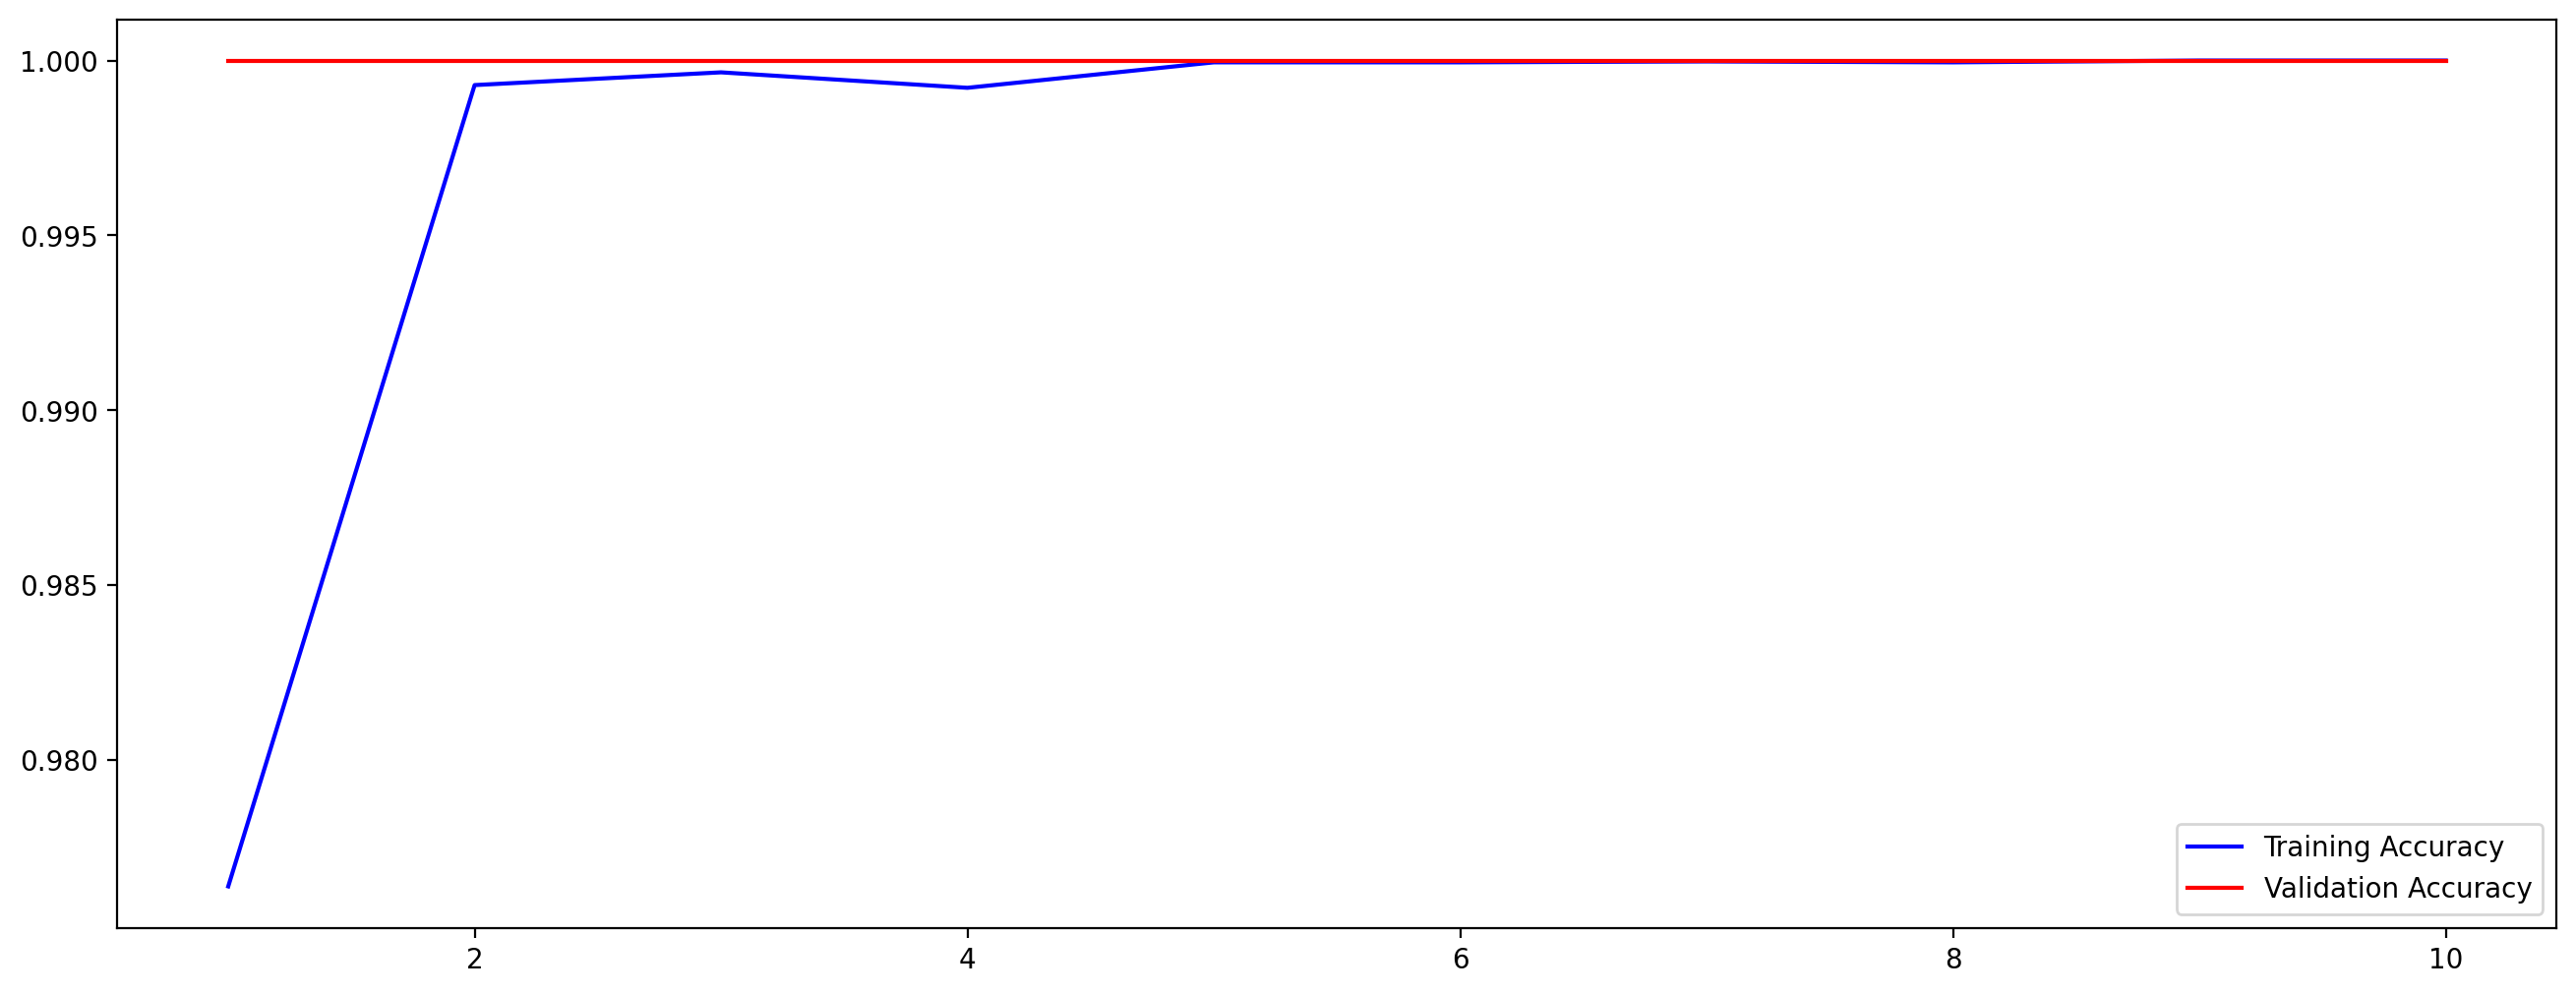

In [37]:
num_epochs = range(1,11)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend() #plot for accuracy

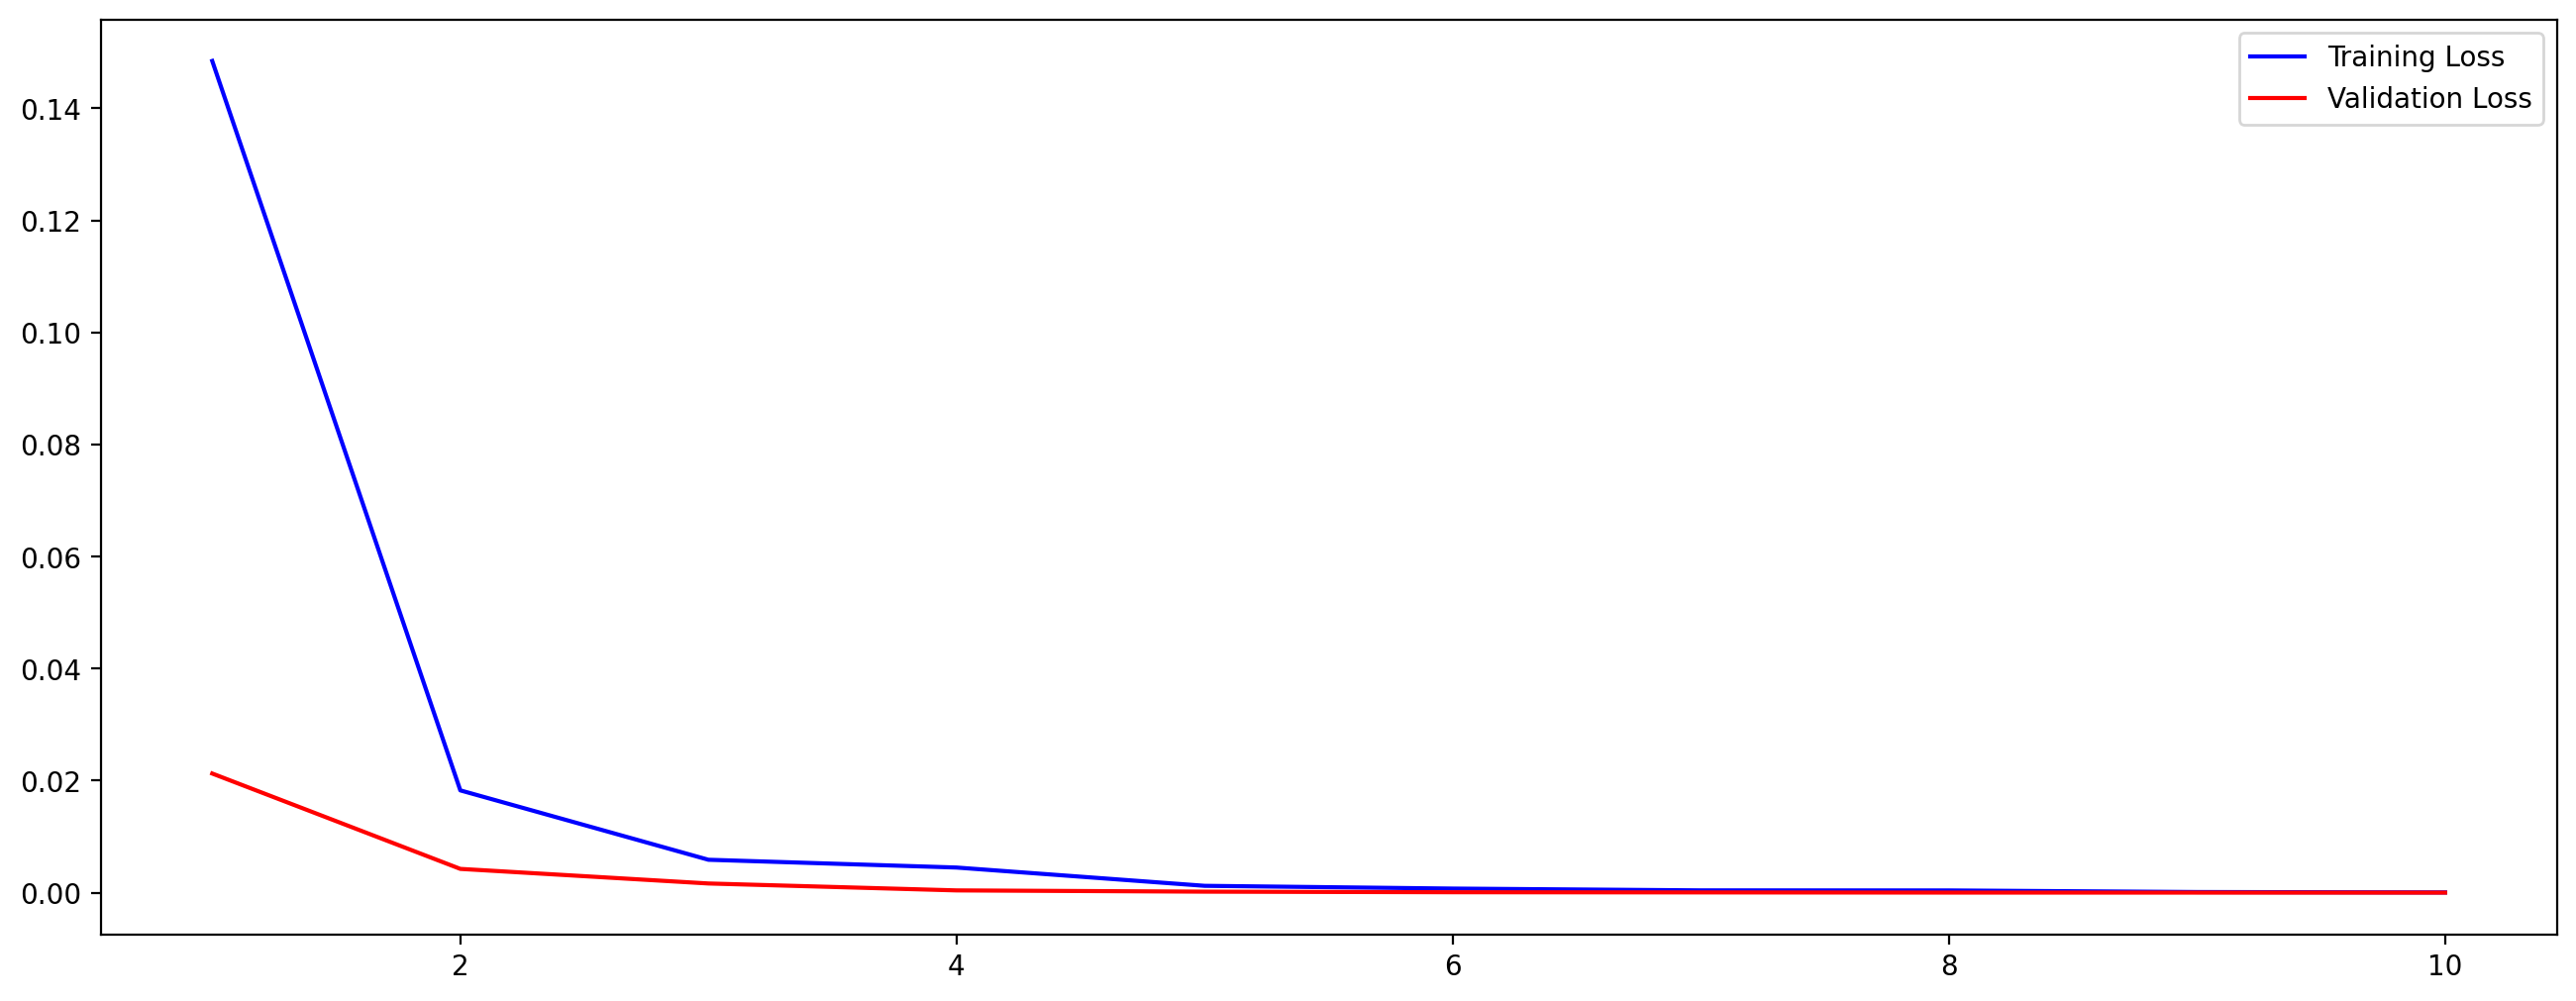

In [38]:
num_epochs = range(1,11)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, loss_train, c = 'blue', label = 'Training Loss')
plt.plot(num_epochs, loss_val, c = 'red', label = 'Validation Loss')
plt.legend() #plot loss